In [189]:
import pandas as pd
import numpy as np

In [190]:
data = pd.read_csv("TrojanDetection (3).csv")

In [191]:
data.drop(columns = data.columns[0], axis = 1, inplace= True)

In [192]:
# prompt: drop columns which have more than 80% data as zero

# get the percentage of zeros in each column
zeros_percent = (data == 0).mean(axis=0) * 100

# select columns with more than 80% zeros
drop_columns = zeros_percent[zeros_percent > 60].index.tolist()

# drop the selected columns
data1 = data.drop(labels=drop_columns, axis=1)

# print the updated data
data1.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Class
0,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17-07-2017 01:18,10743584,4,4,...,168.000000,100,4,372,4,672,65535,511,20,Trojan
1,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17-07-2017 10:25,254217,6,7,...,749.428571,204,6,3191,7,5246,-1,-1,20,Trojan
2,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30-06-2017 07:16,1023244,1,1,...,179.000000,32,1,30,1,179,-1,-1,32,Benign
3,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13-07-2017 03:48,286483,1,1,...,106.000000,20,1,40,1,106,-1,-1,20,Trojan
4,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05-07-2017 10:47,65633087,12,10,...,562.200000,392,12,767,10,5622,65535,79,32,Benign


In [193]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp'] 
label_encoder = LabelEncoder()

for column in categorical_columns:
    data1.loc[:, column] = label_encoder.fit_transform(data2[column])

In [194]:
data1['Class'] = data1['Class'].astype(str).str.lower()
data2 = data1.copy()
data2['Class'] = data2['Class'].apply(lambda x: 1 if x == 'trojan' else 0)
data2.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Class
0,46111,7,49975,352,80,6,1967,10743584,4,4,...,168.000000,100,4,372,4,672,65535,511,20,1
1,74905,7,49169,895,443,17,2114,254217,6,7,...,749.428571,204,6,3191,7,5246,-1,-1,20,1
2,9217,7,37749,7,53,17,2222,1023244,1,1,...,179.000000,32,1,30,1,179,-1,-1,32,0
3,10418,7,41352,7,53,17,1641,286483,1,1,...,106.000000,20,1,40,1,106,-1,-1,20,1
4,20763,5,44353,220,443,6,1011,65633087,12,10,...,562.200000,392,12,767,10,5622,65535,79,32,0


In [195]:
X = data2.drop('Class', axis=1)
y = data2['Class']

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [197]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = scaler.get_feature_names_out())

X_scaled.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward
0,-0.254681,-0.301851,0.615201,-0.551042,-0.374990,-0.505654,1.255342,-0.038628,-0.092527,-0.055528,...,0.166762,-0.041883,-0.110092,-0.092527,-0.072645,-0.055528,-0.063037,1.403291,-0.153687,-1.172879
1,0.846472,-0.301851,0.571481,0.048341,-0.351039,1.916993,1.489244,-0.494134,-0.025086,-0.027333,...,3.218552,1.776236,0.007339,-0.025086,0.392864,-0.027333,-0.032898,-0.743407,-0.221689,-1.172879
2,-1.665597,-0.301851,-0.047966,-0.931866,-0.376772,1.916993,1.661090,-0.460739,-0.193689,-0.083723,...,-0.271360,-0.007486,-0.186874,-0.193689,-0.129121,-0.083723,-0.066285,-0.743407,-0.221689,0.631082
3,-1.619668,-0.301851,0.147469,-0.931866,-0.376772,1.916993,0.736620,-0.492733,-0.193689,-0.083723,...,-0.201817,-0.235756,-0.200423,-0.193689,-0.127469,-0.083723,-0.066766,-0.743407,-0.221689,-1.172879
4,-1.224050,-0.307995,0.310250,-0.696749,-0.351039,-0.505654,-0.265817,2.344980,0.177238,0.000862,...,-0.035493,1.190775,0.219619,0.177238,-0.007418,0.000862,-0.030421,1.403291,-0.211064,0.631082


In [198]:
# Remove constant features
constant_filter = VarianceThreshold(threshold=0)
X_filtered = constant_filter.fit_transform(X_scaled)
X_filtered = pd.DataFrame(X_filtered,columns = constant_filter.get_feature_names_out())

X_filtered.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward
0,-0.254681,-0.301851,0.615201,-0.551042,-0.374990,-0.505654,1.255342,-0.038628,-0.092527,-0.055528,...,0.166762,-0.041883,-0.110092,-0.092527,-0.072645,-0.055528,-0.063037,1.403291,-0.153687,-1.172879
1,0.846472,-0.301851,0.571481,0.048341,-0.351039,1.916993,1.489244,-0.494134,-0.025086,-0.027333,...,3.218552,1.776236,0.007339,-0.025086,0.392864,-0.027333,-0.032898,-0.743407,-0.221689,-1.172879
2,-1.665597,-0.301851,-0.047966,-0.931866,-0.376772,1.916993,1.661090,-0.460739,-0.193689,-0.083723,...,-0.271360,-0.007486,-0.186874,-0.193689,-0.129121,-0.083723,-0.066285,-0.743407,-0.221689,0.631082
3,-1.619668,-0.301851,0.147469,-0.931866,-0.376772,1.916993,0.736620,-0.492733,-0.193689,-0.083723,...,-0.201817,-0.235756,-0.200423,-0.193689,-0.127469,-0.083723,-0.066766,-0.743407,-0.221689,-1.172879
4,-1.224050,-0.307995,0.310250,-0.696749,-0.351039,-0.505654,-0.265817,2.344980,0.177238,0.000862,...,-0.035493,1.190775,0.219619,0.177238,-0.007418,0.000862,-0.030421,1.403291,-0.211064,0.631082


In [199]:
# Calculate mutual information on the original features
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
print("Mutual Information of each feature:")
print(mutual_info_series.sort_values(ascending=False))

Mutual Information of each feature:
 Timestamp                      0.690269
Flow ID                         0.479892
 Source IP                      0.127429
 Destination IP                 0.123823
 Source Port                    0.106641
 Packet Length Mean             0.055338
 Packet Length Std              0.054876
 Packet Length Variance         0.053732
 Total Length of Bwd Packets    0.052787
 Avg Bwd Segment Size           0.052382
 Subflow Bwd Bytes              0.051212
 Average Packet Size            0.051136
 Bwd Packet Length Mean         0.050986
 Fwd Packet Length Mean         0.047138
Total Length of Fwd Packets     0.046048
 Avg Fwd Segment Size           0.045848
 Flow Duration                  0.045397
 Flow IAT Max                   0.044729
 Subflow Fwd Bytes              0.043655
Init_Win_bytes_forward          0.042598
 Fwd Packet Length Max          0.039479
 Flow IAT Mean                  0.038403
 Max Packet Length              0.038250
Fwd Packets/s        

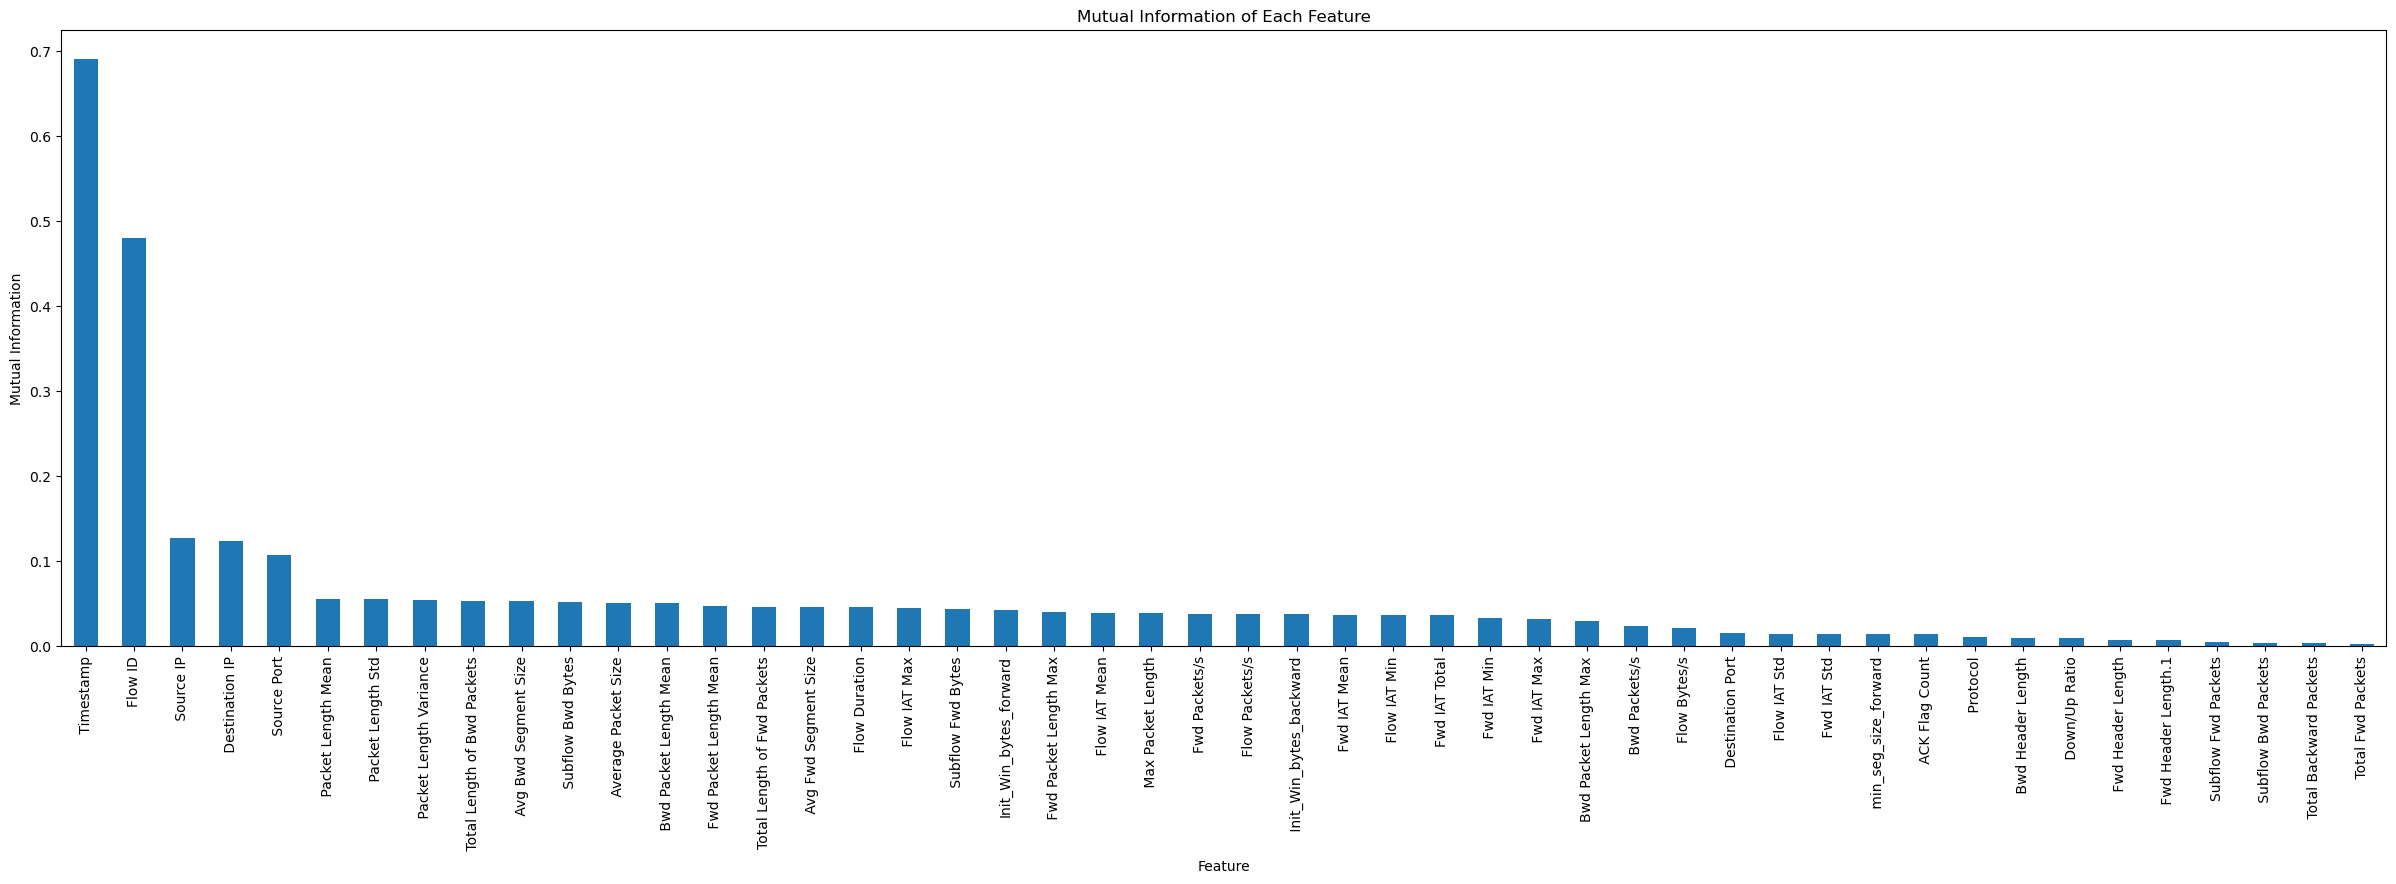

In [200]:
mutual_info_series_sorted = mutual_info_series.sort_values(ascending=False)

plt.figure(figsize=(30, 8))
mutual_info_series_sorted.plot.bar()
plt.title('Mutual Information of Each Feature')
plt.ylabel('Mutual Information')
plt.xlabel('Feature')
plt.show()

In [201]:
from sklearn.feature_selection import SelectKBest,f_classif
# Feature selection using SelectKBest with mutual_info_classif
k_best_features = 20  # Adjust the number of features you want to select
selector = SelectKBest(score_func=mutual_info_classif, k=k_best_features)
X_selected = selector.fit_transform(X, y)


In [202]:
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Timestamp', ' Flow Duration', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Mean',
       ' Bwd Packet Length Mean', ' Flow IAT Max', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Subflow Fwd Bytes',
       ' Subflow Bwd Bytes', 'Init_Win_bytes_forward'],
      dtype='object')


In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [204]:
# from sklearn.ensemble import RandomForestClassifier
# rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
# rf_classifier.fit(X_train, y_train)
# rf_classifier.score(X_test,y_test)
from sklearn.ensemble import RandomForestClassifier
# Setup random seed
np.random.seed(42)
rf_classifier = RandomForestClassifier(n_estimators = 50) #50 trees (estimators). The n_estimators parameter controls how many trees will be used in the forest.
rf_classifier.fit(X_train,y_train)
rf_classifier.score(X_test,y_test)

0.9994365668137853

In [208]:
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

In [210]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9994365668137853
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26074
           1       1.00      1.00      1.00     27171

    accuracy                           1.00     53245
   macro avg       1.00      1.00      1.00     53245
weighted avg       1.00      1.00      1.00     53245

ROC AUC Score: 0.9999947286824411
